# Root Cause Analysis - PyRCA

## Import all the necessary libraries

In [100]:
import networkx as nx
import numpy as np
import pyrca
from pyrca.analyzers.ht import HT, HTConfig
import matplotlib.pyplot as plt
import pandas as pd
import os


## Create the Causal Graph (non-lagged)

In [101]:
G = nx.DiGraph()
nodes = [
    'cam_1_X', 'cam_2_X', 'cam_3_X',
    'cam_1_Y', 'cam_2_Y', 'cam_3_Y',
    'EoL_1_X', 'EoL_2_X', 'EoL_3_X', 'EoL_4_X', 'EoL_5_X', 'EoL_6_X',
    'EoL_1_Y', 'EoL_2_Y', 'EoL_3_Y', 'EoL_4_Y', 'EoL_5_Y', 'EoL_6_Y',
    'rob_1_1', 'rob_1_2', 'rob_1_3', 'rob_1_4', 'rob_1_maxVel',
    'rob_2_1', 'rob_2_2', 'rob_2_3', 'rob_2_4', 'rob_2_maxVel',
    'rob_1_gripper', 'rob_2_gripper',
    'con_1','con_2','con_3'
]

edges = [
    ('cam_1_X', 'rob_2_1'), ('cam_1_Y', 'rob_2_1'),
    ('cam_1_X', 'rob_2_2'), ('cam_1_Y', 'rob_2_2'),
    ('cam_1_X', 'rob_2_3'), ('cam_1_Y', 'rob_2_3'),
    ('cam_1_X', 'rob_2_4'), ('cam_1_Y', 'rob_2_4'),
    
    ('cam_2_X', 'rob_1_1'), ('cam_2_Y', 'rob_1_1'),
    ('cam_2_X', 'rob_1_2'), ('cam_2_Y', 'rob_1_2'),
    ('cam_2_X', 'rob_1_3'), ('cam_2_Y', 'rob_1_3'),
    ('cam_2_X', 'rob_1_4'), ('cam_2_Y', 'rob_1_4'),
    
    ('cam_3_X', 'rob_1_1'), ('cam_3_Y', 'rob_1_1'),
    ('cam_3_X', 'rob_1_2'), ('cam_3_Y', 'rob_1_2'),
    ('cam_3_X', 'rob_1_3'), ('cam_3_Y', 'rob_1_3'),
    ('cam_3_X', 'rob_1_4'), ('cam_3_Y', 'rob_1_4'),
    
    ('rob_1_maxVel', 'rob_1_1'), ('rob_1_maxVel', 'rob_1_2'),
    ('rob_1_maxVel', 'rob_1_3'), ('rob_1_maxVel', 'rob_1_4'),
    
    ('rob_2_maxVel', 'rob_2_1'), ('rob_2_maxVel', 'rob_2_2'),
    ('rob_2_maxVel', 'rob_2_3'), ('rob_2_maxVel', 'rob_2_4'),
    
    ('con_2', 'rob_1_1'), ('con_2', 'rob_1_2'), ('con_2', 'rob_1_3'), ('con_2', 'rob_1_4'),
    ('con_3', 'rob_1_1'), ('con_3', 'rob_1_2'), ('con_3', 'rob_1_3'), ('con_3', 'rob_1_4'),

    ('con_2', 'rob_2_1'), ('con_2', 'rob_2_2'), ('con_2', 'rob_2_3'), ('con_2', 'rob_2_4'),
    ('con_1', 'rob_2_1'), ('con_1', 'rob_2_2'), ('con_1', 'rob_2_3'), ('con_1', 'rob_2_4'),

    ('con_2', 'EoL_1_X'), ('con_2', 'EoL_1_Y'),
    
    ('rob_1_1', 'rob_2_1'), ('rob_1_1', 'rob_2_2'), ('rob_1_1', 'rob_2_3'), ('rob_1_1', 'rob_2_4'),
    ('rob_1_2', 'rob_2_1'), ('rob_1_2', 'rob_2_2'), ('rob_1_2', 'rob_2_3'), ('rob_1_2', 'rob_2_4'),
    ('rob_1_3', 'rob_2_1'), ('rob_1_3', 'rob_2_2'), ('rob_1_3', 'rob_2_3'), ('rob_1_3', 'rob_2_4'),
    ('rob_1_4', 'rob_2_1'), ('rob_1_4', 'rob_2_2'), ('rob_1_4', 'rob_2_3'), ('rob_1_4', 'rob_2_4'),
    
    ('rob_1_gripper', 'rob_2_1'), ('rob_1_gripper', 'rob_2_2'),
    ('rob_1_gripper', 'rob_2_3'), ('rob_1_gripper', 'rob_2_4'),

    ('rob_1_1', 'EoL_2_X'), ('rob_1_2', 'EoL_2_X'),
    ('rob_1_3', 'EoL_2_X'), ('rob_1_4', 'EoL_2_X'),
    ('rob_1_1', 'EoL_2_Y'), ('rob_1_2', 'EoL_2_Y'),
    ('rob_1_3', 'EoL_2_Y'), ('rob_1_4', 'EoL_2_Y'),
    
    ('rob_2_1', 'EoL_3_X'), ('rob_2_2', 'EoL_3_X'),
    ('rob_2_3', 'EoL_3_X'), ('rob_2_4', 'EoL_3_X'),
    ('rob_2_1', 'EoL_3_Y'), ('rob_2_2', 'EoL_3_Y'),
    ('rob_2_3', 'EoL_3_Y'), ('rob_2_4', 'EoL_3_Y'),
    
    ('rob_2_1', 'EoL_4_X'), ('rob_2_2', 'EoL_4_X'),
    ('rob_2_3', 'EoL_4_X'), ('rob_2_4', 'EoL_4_X'),
    ('rob_2_1', 'EoL_4_Y'), ('rob_2_2', 'EoL_4_Y'),
    ('rob_2_3', 'EoL_4_Y'), ('rob_2_4', 'EoL_4_Y'),
    
    ('rob_2_1', 'EoL_5_X'), ('rob_2_2', 'EoL_5_X'),
    ('rob_2_3', 'EoL_5_X'), ('rob_2_4', 'EoL_5_X'),
    ('rob_2_1', 'EoL_5_Y'), ('rob_2_2', 'EoL_5_Y'),
    ('rob_2_3', 'EoL_5_Y'), ('rob_2_4', 'EoL_5_Y'),

    ('rob_2_1', 'EoL_6_X'), ('rob_2_2', 'EoL_6_X'),
    ('rob_2_3', 'EoL_6_X'), ('rob_2_4', 'EoL_6_X'),
    ('rob_2_1', 'EoL_6_Y'), ('rob_2_2', 'EoL_6_Y'),
    ('rob_2_3', 'EoL_6_Y'), ('rob_2_4', 'EoL_6_Y'),

    ('rob_1_gripper', 'EoL_2_X'), ('rob_1_gripper', 'EoL_2_Y'),
    
    ('rob_2_gripper', 'EoL_3_X'), ('rob_2_gripper', 'EoL_3_Y'),
    ('rob_2_gripper', 'EoL_4_X'), ('rob_2_gripper', 'EoL_4_Y'),
    ('rob_2_gripper', 'EoL_5_X'), ('rob_2_gripper', 'EoL_5_Y'),
    ('rob_2_gripper', 'EoL_6_X'), ('rob_2_gripper', 'EoL_6_Y'),
]

EoL_nodes = [
    'EoL_1_X', 'EoL_2_X', 'EoL_3_X', 'EoL_4_X', 'EoL_5_X', 'EoL_6_X',
    'EoL_1_Y', 'EoL_2_Y', 'EoL_3_Y', 'EoL_4_Y', 'EoL_5_Y', 'EoL_6_Y'
]

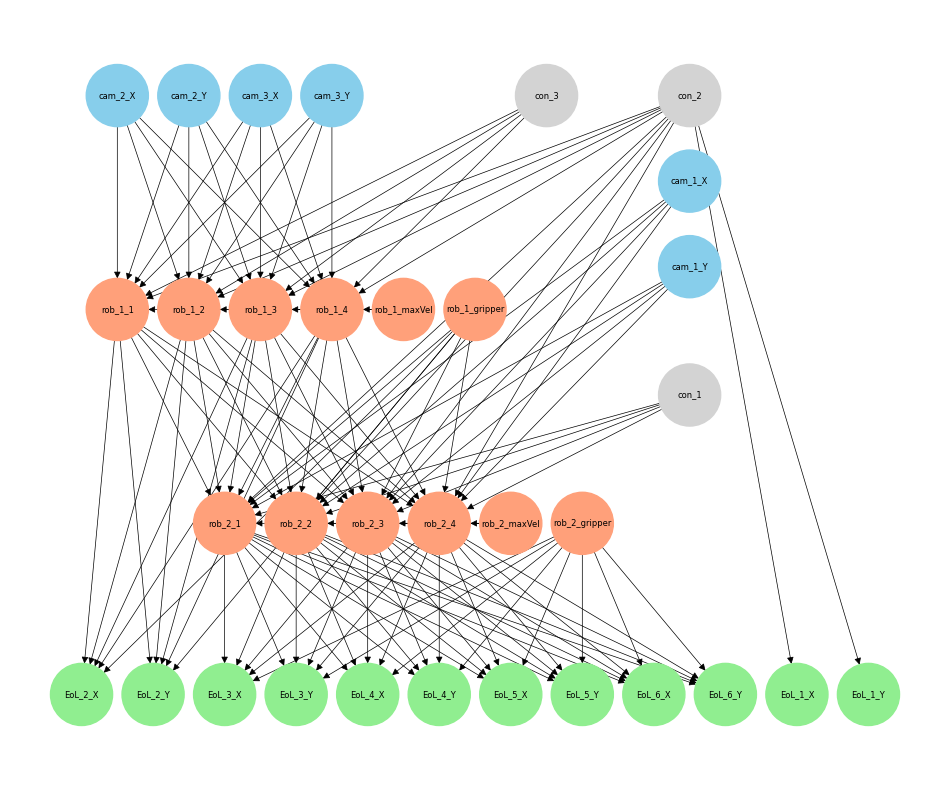

In [102]:
G.add_nodes_from(nodes)

G.add_edges_from(edges)

pos = {
    'cam_1_X':(7,4), 'cam_2_X':(-9,6), 'cam_3_X':(-5,6),
    'cam_1_Y':(7,2), 'cam_2_Y':(-7,6), 'cam_3_Y':(-3,6),
    'EoL_1_X':(10,-8), 'EoL_2_X':(-10,-8), 'EoL_3_X':(-6,-8), 'EoL_4_X':(-2,-8), 'EoL_5_X':(2,-8), 'EoL_6_X':(6,-8),
    'EoL_1_Y':(12,-8), 'EoL_2_Y':(-8,-8), 'EoL_3_Y':(-4,-8), 'EoL_4_Y':(0,-8), 'EoL_5_Y':(4,-8), 'EoL_6_Y':(8,-8),
    'rob_2_1':(-6,-4), 'rob_2_2':(-4,-4), 'rob_2_3':(-2,-4), 'rob_2_4':(-0,-4), 'rob_2_maxVel':(2,-4),
    'rob_1_1':(-9,1), 'rob_1_2':(-7,1), 'rob_1_3':(-5,1), 'rob_1_4':(-3,1), 'rob_1_maxVel':(-1,1),
    'rob_1_gripper':(1,1), 'rob_2_gripper':(4,-4),
    'con_1':(7,-1),'con_2':(7,6),'con_3':(3,6)
}

colors = {
    'cam_1_X':'skyblue', 'cam_2_X':'skyblue', 'cam_3_X':'skyblue',
    'cam_1_Y':'skyblue', 'cam_2_Y':'skyblue', 'cam_3_Y':'skyblue',
    'EoL_1_X':'lightgreen', 'EoL_2_X':'lightgreen', 'EoL_3_X':'lightgreen', 'EoL_4_X':'lightgreen', 'EoL_5_X':'lightgreen', 'EoL_6_X':'lightgreen',
    'EoL_1_Y':'lightgreen', 'EoL_2_Y':'lightgreen', 'EoL_3_Y':'lightgreen', 'EoL_4_Y':'lightgreen', 'EoL_5_Y':'lightgreen', 'EoL_6_Y':'lightgreen',
    'rob_1_1':'lightsalmon', 'rob_1_2':'lightsalmon', 'rob_1_3':'lightsalmon', 'rob_1_4':'lightsalmon', 'rob_1_maxVel':'lightsalmon',
    'rob_2_1':'lightsalmon', 'rob_2_2':'lightsalmon', 'rob_2_3':'lightsalmon', 'rob_2_4':'lightsalmon', 'rob_2_maxVel':'lightsalmon',
    'rob_1_gripper':'lightsalmon', 'rob_2_gripper':'lightsalmon',
    'con_1':'lightgrey','con_2':'lightgrey','con_3':'lightgrey'
}

# Draw the graph
plt.figure(figsize=(12, 10))
plt.xlim((-12,14))
plt.ylim((-10,8))
nx.draw(G, pos,with_labels=True,node_size=2000, node_color=[colors[node] for node in G.nodes()], font_size=6, arrowsize=10,width=0.5)

### Retrieve the adjacency matrix from the causal graph

In [103]:
adj_matrix_extended = nx.to_pandas_adjacency(G,nodes)

## Read data from dataset folder

In [104]:
# Speci the directory path
directory_path = 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset'
files = {}

# Get a list of all items (files and directories) in the specified path
all_items = os.listdir(directory_path)

# Iterate over each item and check if it's a directory
for item in all_items:
    folder_path = os.path.join(directory_path, item)
    if os.path.isdir(folder_path):
        print(f"Processing folder: {item}")

        folder_contents = os.listdir(folder_path)
        for file in folder_contents:
            file_path = os.path.join(folder_path, file)
            print(f"-> {file}")
            files[file] = file_path

Processing folder: Dataset_2024-06-18_18-29-49
-> data_1_normal.csv
-> data_2_gripper_1.csv
-> data_3_gripper_2.csv
-> true_no_lagged_graph_extendend.csv
{'data_1_normal.csv': 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-06-18_18-29-49\\data_1_normal.csv', 'data_2_gripper_1.csv': 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-06-18_18-29-49\\data_2_gripper_1.csv', 'data_3_gripper_2.csv': 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-06-18_18-29-49\\data_3_gripper_2.csv', 'true_no_lagged_graph_extendend.csv': 'G:\\My Drive\\Master Thesis\\Simulation\\Dataset\\Dataset_2024-06-18_18-29-49\\true_no_lagged_graph_extendend.csv'}


In [105]:
normal_data_df = pd.read_csv(files['data_1_normal.csv'],skiprows=range(1, 660))
normal_data_df = normal_data_df[nodes]
normal_data_df.head()

,cam_1_X,cam_2_X,cam_3_X,cam_1_Y,cam_2_Y,cam_3_Y,EoL_1_X,EoL_2_X,EoL_3_X,EoL_4_X,...,rob_2_1,rob_2_2,rob_2_3,rob_2_4,rob_2_maxVel,rob_1_gripper,rob_2_gripper,con_1,con_2,con_3
0,0.632812,0.742188,0.773438,0.632812,0.757812,0.757812,0.757812,0.632812,0.210938,0.210938,...,8.131158,-9.595828,-1.796492,-1.361393,5,100,100,80.0,80.0,80.0
1,0.632812,0.742188,0.773438,0.632812,0.757812,0.757812,0.757812,0.632812,0.210938,0.210938,...,4.969704,-6.262649,4.017334,-4.057089,5,100,100,80.0,80.0,80.0
2,0.632812,0.742188,0.773438,0.632812,0.757812,0.757812,0.757812,0.632812,0.210938,0.210938,...,4.200801,-5.908944,4.965323,-3.926172,5,100,100,80.0,80.0,80.0
3,0.632812,0.742188,0.773438,0.632812,0.757812,0.757812,0.757812,0.632812,0.210938,0.210938,...,0.008565,-0.006629,0.180267,0.066161,5,100,100,80.0,80.0,80.0
4,0.632812,0.742188,0.773438,0.632812,0.757812,0.757812,0.757812,0.632812,0.210938,0.210938,...,-2.603532,3.752904,-2.691358,2.350751,5,100,100,80.0,80.0,80.0


In [106]:
abnormal_data_df = pd.read_csv(files['data_2_gripper_1.csv'],skiprows=range(1, 660))
abnormal_data_df = abnormal_data_df[nodes]
abnormal_data_df.head()

,cam_1_X,cam_2_X,cam_3_X,cam_1_Y,cam_2_Y,cam_3_Y,EoL_1_X,EoL_2_X,EoL_3_X,EoL_4_X,...,rob_2_1,rob_2_2,rob_2_3,rob_2_4,rob_2_maxVel,rob_1_gripper,rob_2_gripper,con_1,con_2,con_3
0,0.632812,0.757812,0.773438,0.632812,0.757812,0.757812,0.742188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,0,100,80.0,80.0,80.0
1,0.632812,0.757812,0.773438,0.632812,0.757812,0.757812,0.742188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,0,100,80.0,80.0,80.0
2,0.632812,0.757812,0.773438,0.632812,0.757812,0.757812,0.742188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,0,100,80.0,80.0,80.0
3,0.632812,0.757812,0.773438,0.632812,0.757812,0.757812,0.742188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,0,100,80.0,80.0,80.0
4,0.632812,0.757812,0.773438,0.632812,0.757812,0.757812,0.742188,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,0,100,80.0,80.0,80.0


,EoL_2_X,EoL_3_X,EoL_4_X,EoL_5_X,EoL_6_X,EoL_2_Y,EoL_3_Y,EoL_4_Y,EoL_5_Y,EoL_6_Y
0,"{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5...","{'root_cause': 'rob_1_gripper', 'score': 101.5..."
1,"{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718...","{'root_cause': 'cam_2_X', 'score': 7.697676718..."
2,"{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757...","{'root_cause': 'rob_1_2', 'score': 6.256228757..."


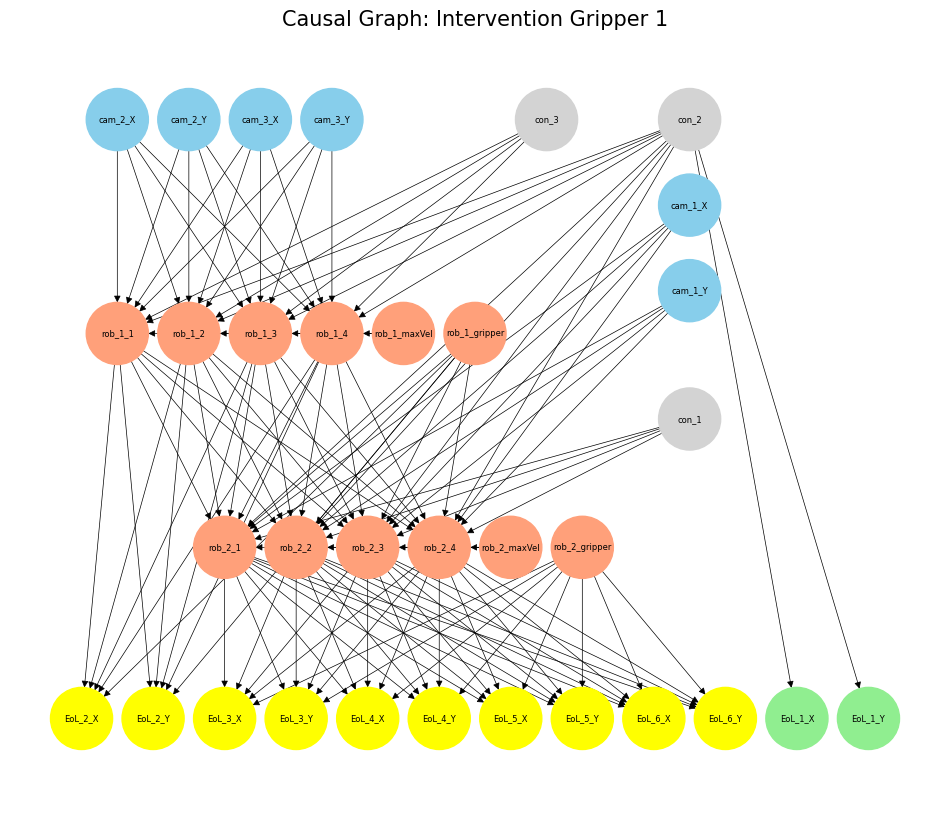

In [107]:
model = HT(config=HTConfig(adj_matrix_extended))

model.train(normal_data_df)

abnormal_nodes = []
new_colors = colors.copy()

results = pd.DataFrame()
for node in EoL_nodes:
    if (abnormal_data_df[node] == 0.0).any():
        abnormal_nodes.append(node)
        new_colors[node] = 'yellow'
        results[node] = model.find_root_causes(abnormal_data_df,node, True).to_list()

display(results)

# Draw the graph
plt.figure(figsize=(12, 10))
plt.xlim((-12,14))
plt.ylim((-10,8))
plt.title('Causal Graph: Intervention Gripper 1', fontsize=15)
nx.draw(G, pos,with_labels=True,node_size=2000, node_color=[new_colors[node] for node in G.nodes()], font_size=6, arrowsize=10,width=0.5)


In [108]:
abnormal_data_df = pd.read_csv(files['data_3_gripper_2.csv'],skiprows=range(1, 660))
abnormal_data_df = abnormal_data_df[nodes]
abnormal_data_df.head()

,cam_1_X,cam_2_X,cam_3_X,cam_1_Y,cam_2_Y,cam_3_Y,EoL_1_X,EoL_2_X,EoL_3_X,EoL_4_X,...,rob_2_1,rob_2_2,rob_2_3,rob_2_4,rob_2_maxVel,rob_1_gripper,rob_2_gripper,con_1,con_2,con_3
0,0.632812,0.773438,0.773438,0.617188,0.75,0.757812,0.757812,0.648438,0.0,0.0,...,8.131129,-9.595835,-1.796462,-1.361364,5,100,0,80.0,80.0,80.0
1,0.632812,0.773438,0.773438,0.617188,0.75,0.757812,0.757812,0.648438,0.0,0.0,...,4.969688,-6.262634,4.017345,-4.057069,5,100,0,80.0,80.0,80.0
2,0.632812,0.773438,0.773438,0.617188,0.75,0.757812,0.757812,0.648438,0.0,0.0,...,4.200805,-5.908947,4.965318,-3.926178,5,100,0,80.0,80.0,80.0
3,0.632812,0.773438,0.773438,0.617188,0.75,0.757812,0.757812,0.648438,0.0,0.0,...,0.008566,-0.006630,0.180266,0.066160,5,100,0,80.0,80.0,80.0
4,0.632812,0.773438,0.773438,0.617188,0.75,0.757812,0.757812,0.648438,0.0,0.0,...,-2.603532,3.752904,-2.691358,2.350751,5,100,0,80.0,80.0,80.0


,EoL_3_X,EoL_4_X,EoL_5_X,EoL_6_X,EoL_3_Y,EoL_4_Y,EoL_5_Y,EoL_6_Y
0,"{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2...","{'root_cause': 'rob_2_gripper', 'score': 100.2..."
1,"{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347...","{'root_cause': 'rob_1_2', 'score': 7.861888347..."
2,"{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866...","{'root_cause': 'rob_1_3', 'score': 7.675822866..."


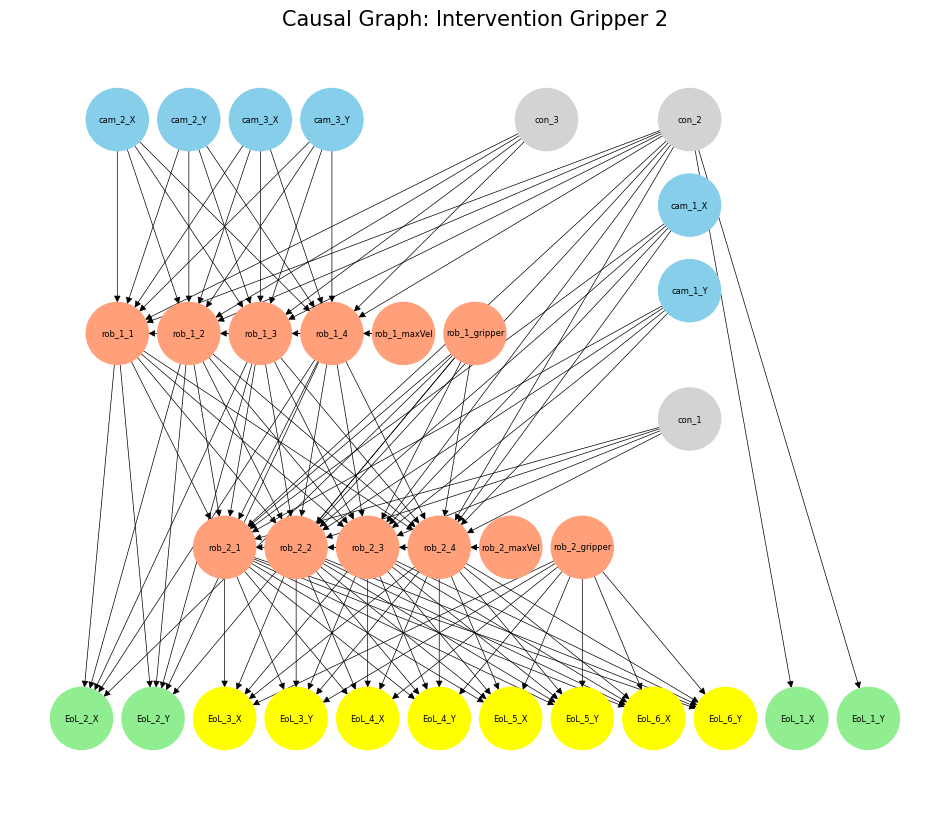

In [109]:
abnormal_nodes = []
abnormal_colors = colors.copy()
results = pd.DataFrame()
for node in EoL_nodes:
    if (abnormal_data_df[node] == 0.0).any():
        abnormal_nodes.append(node)
        new_colors[node] = 'yellow'
        results[node] = model.find_root_causes(abnormal_data_df,node, True).to_list()

display(results)

# Draw the graph
plt.figure(figsize=(12, 10))
plt.xlim((-12,14))
plt.ylim((-10,8))
plt.title('Causal Graph: Intervention Gripper 2', fontsize=15)
nx.draw(G, pos,with_labels=True,node_size=2000, node_color=[new_colors[node] for node in G.nodes()], font_size=6, arrowsize=10,width=0.5)